# **Laboratorio 5**
## **Parte 1**

- Derek Arreaga - 22537
- Paula Barillas - 22764
- Mónica Salvatierra - 22249

Link del repositorio: https://github.com/FabianKel/ModSim-LAB5

### **Teoría**

Defina y responda

1. ¿Cuál es la característica más definitoria de una red libre de escala que la diferencia de una red aleatoria
(Erdős-Rényi)? Explique por qué esta característica obliga a los modeladores a ir más allá de los modelos
que se basan únicamente en propiedades promedio (como el modelo SIR clásico).

- La diferencia clave entre una red libre de escala y una red aleatoria es que la primera una ley de potencia, puesto qu existen nodos que tendrán grandes cantidades de conexiones, así como otros qu tendran pocas cantidades. Por otro lado, una red aleatoria Erdős-Rényi tiene una distribución de conexiones cercana a la de Poisson. Es decir, casi todos los nodos tiene un número de conexiones cercano al promedio.
<br>
<br>
Esta característica obliga a los modeladores a ir más allá de enfoques basados en propiedades promedio, como el modelo SIR clásico, porque el comportamiento global de la red no depende de un nodo “estándar”, sino de la existencia de estos hubs (que conectan a varios nodos entre sí). En una red libre de escala, la propagación de información o de una enfermedad puede verse dominada por estos nodos altamente conectados, lo que hace que las predicciones basadas solo en el promedio sean realmente poco realistas.

<br>

2. Considere la fórmula de la ley de potencia vista en clase. ¿Qué implica un valor menor de gamma (por
ejemplo, 2,1 frente a 3,5) sobre la prevalencia de nodos altamente conectados en la red?

- Un valor menor de gamma (por ejemplo, γ=2.1) implica que la probabilidad de encontrar nodos con grados muy altos es mayor que cuando el exponente es mayor (como γ=3.5). En otras palabras, mientras más bajo es el valor de gamma, más común es que existan hubs extremadamente conectados en la red. Esto significa que la estructura de la red se vuelve aún más desproporcionada, puesto que la mayoría de los nodos sigue teniendo pocas conexiones, pero unos cuantos concentran una influencia desbalanceada en la dinámica de propagación.

<br>

3. ¿Por qué el número reproductivo básico R0 para una enfermedad que se propaga en una red libre de escala
depende de la varianza de la distribución de grados, no solo de la media?

- El número reproductivo básico para una enfermedad que se propaga en una red libre de ecala depende de la varianza de la distribución de grados, no solo de la media porque la propagación depende fuertemente de la conectividad que tenga el nodo infectado. Si la varianza es muy grande, los hubs hacen que incluso con un valor promedio moderado de conexiones, la enfermedad pueda extenderse rápidamente. Por ello, la varianza se convierte en un factor central para determinar si la epidemia se mantiene o desaparece.


<br>

4. ¿Por qué las intervenciones dirigidas (p. ej., centrar las pruebas, el uso de mascarillas o la vacunación en los
centros de la red) son particularmente eficaces y eficientes en una red sin escala en comparación con una
red aleatoria? Explíquelo desde una perspectiva matemática y práctica.

- En redes libres de escala, las intervenciones dirigidas hacia los hubs son especialmente eficaces porque estos nodos concentran una gran proporción de las conexiones y, por tanto, del potencial de transmisión. Desde un punto de vista matemático, eliminar o proteger a los nodos con grados muy altos reduce de manera drástica tanto la media como la varianza de la distribución de grados, disminuyendo la razón (k^2/k) que sostiene la propagación. En términos prácticos, en lugar de dispersar recursos uniformemente (como en una red aleatoria), focalizarlos en los puntos críticos logra un impacto mucho mayor con menor costo, lo que se traduce en intervenciones más eficientes.

### **Práctica**

In [ ]:
#%pip install networkx

Note: you may need to restart the kernel to use updated packages.


#### **Importar librerías**

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

np.random.seed(16)

#### **Generación de redes**

In [ ]:
n = 1000           # número de nodos
m = 3              # cada nuevo nodo conecta a m existentes (BA) -> grado promedio aprox 2m
avg_k_target = 2*m # grado promedio objetivo
p = avg_k_target / (n - 1)  # p para ER tal que E[k] aprox 2m

# Generar redes
G_ba = nx.barabasi_albert_graph(n=n, m=m, seed=16)
G_er = nx.erdos_renyi_graph(n=n, p=p, seed=16)

# Grados
deg_ba = np.array([d for _, d in G_ba.degree()])
deg_er = np.array([d for _, d in G_er.degree()])

deg_ba[:5], deg_er[:5], p

(array([ 55,  39,  10,  29, 107]),
 array([9, 3, 4, 5, 2]),
 0.006006006006006006)

#### **Histogramas**

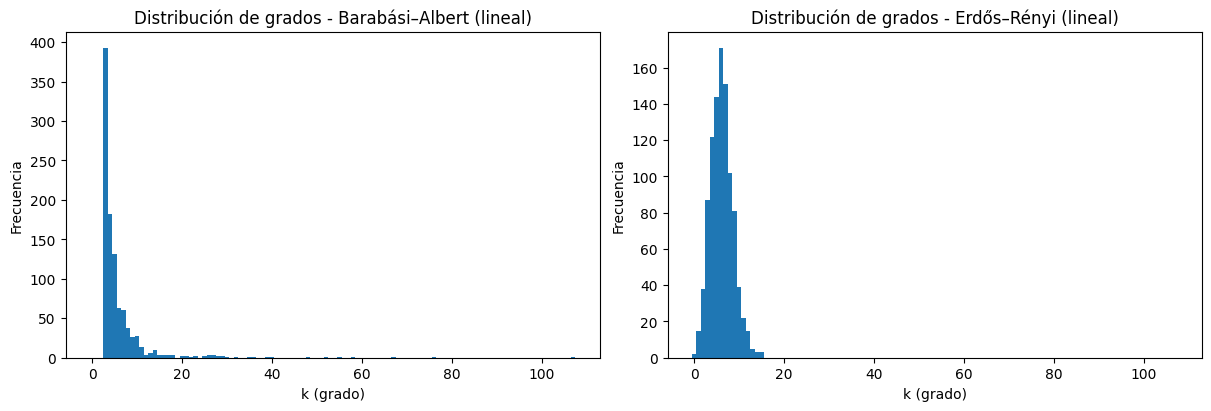

In [ ]:
kmax = int(max(deg_ba.max(), deg_er.max()))
bins = np.arange(0, kmax + 2) - 0.5  

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

axes[0].hist(deg_ba, bins=bins)
axes[0].set_title("Distribución de grados - Barabási–Albert (lineal)")
axes[0].set_xlabel("k (grado)")
axes[0].set_ylabel("Frecuencia")

axes[1].hist(deg_er, bins=bins)
axes[1].set_title("Distribución de grados - Erdős–Rényi (lineal)")
axes[1].set_xlabel("k (grado)")
axes[1].set_ylabel("Frecuencia")

plt.show()

#### **Distribuciones en escala logarítmica**

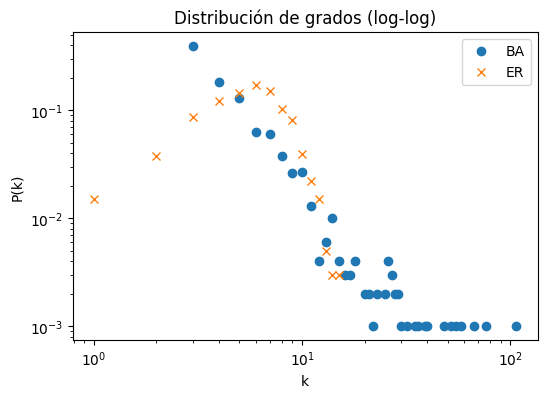

In [6]:
def degree_hist(degrees):
    counts = Counter(degrees)
    ks = np.array(sorted([k for k in counts if k > 0]))
    ps = np.array([counts[k] for k in ks], dtype=float) / len(degrees)
    return ks, ps

ks_ba, ps_ba = degree_hist(deg_ba)
ks_er, ps_er = degree_hist(deg_er)

plt.figure(figsize=(6,4))
plt.loglog(ks_ba, ps_ba, marker='o', linestyle='none', label="BA")
plt.loglog(ks_er, ps_er, marker='x', linestyle='none', label="ER")
plt.title("Distribución de grados (log-log)")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.legend()
plt.show()

#### **Media y varianza de los grados**

In [9]:
def summary_stats(arr):
    return float(np.mean(arr)), float(np.var(arr, ddof=0))

mean_ba, var_ba = summary_stats(deg_ba)
mean_er, var_er = summary_stats(deg_er)

print(f"BA  -> media = {mean_ba:.3f}, varianza = {var_ba:.3f}")
print(f"ER  -> media = {mean_er:.3f}, varianza = {var_er:.3f}")
print(f"p usado para ER: {p:.4f} (E[k_ER]≈p*(n-1)={p*(n-1):.3f})")

BA  -> media = 5.982, varianza = 48.632
ER  -> media = 6.152, varianza = 6.129
p usado para ER: 0.0060 (E[k_ER]≈p*(n-1)=6.000)


1. Describa la marcada diferencia en la forma de los dos histogramas de escala lineal. ¿Qué te dice la forma de la distribución de la red sin escala sobre su estructura?

- En escala lineal, la red Barabási–Albert muestra una distribución altamente sesgada. La mayoría de nodos tienen grado bajo, pero existe una cola extendida con pocos nodos de grado muy alto (hubs). Esta forma indica que existen mecanismos de crecimiento con preferencia por la conexión ("el rico se hace más rico"), que generan heterogeneidad estructural marcada. En contraste, la red Erdős–Rényi presenta un histograma más concentrado alrededor de su media, con simetría aproximada (distribución similar a Poisson para 𝑝 pequeño). Esto refleja un proceso de enlace uniforme al azar, donde es muy improbable observar hubs extremos.

<br>

2. ¿Qué revela el gráfico logarítmico de la distribución de grados de la red sin escala? ¿Qué confirma la línea de tendencia aproximadamente lineal?

- En el gráfico log-log, la distribución de grados de BA se aproxima a una recta en la región de cola, lo que es consistente con un comportamiento de ley de potencia. Esa apariencia lineal en demuestra la presencia de colas pesadas, donde los grados muy altos ocurren con probabilidad significativamente mayor que en distribuciones exponenciales. La red ER, en cambio, no muestra linealidad. Su cola decae más rápido (exponencial), reforzando la ausencia de hubs pronunciados.

<br>

3. Reporte la media y la varianza de cada red. ¿Cómo se comparan los valores de varianza? ¿Por qué esta diferencia es crucial para modelar procesos como la propagación de epidemias?

- Con la construcción usada, ambas redes tienen medias similares (cercanas o iguales a 2m). Sin embargo, la varianza en BA resulta considerablemente mayor que en ER. Esta diferencia surge porque la heterogeneidad de grados en BA, impulsada por los hubs, aumenta la distribución, mientras que ER concentra mayor masa alrededor de la media.

- Esta diferencia es crucial para modelar procesos como la propagación de epidemias porque la dinámica de contagio en redes depende fuertemente de la heterogeneidad de grados. En redes libre de escala, unos pocos hubs concentran muchísimas conexiones, lo que reduce el umbral epidémico y acelera la propagación. Basta infectar un hub para alcanzar gran parte de la red. En redes ER, al no existir hubs extremos y al ser menor la varianza, la difusión es más gradual y requiere condiciones más estrictas (mayor tasa de transmisión) para sostenerse. Esto implica que en redes tipo BA intervenciones dirigidas, por ejemplo la vacunación / testear a nodos de mayor grado son mucho más efectivas y eficientes que intervenciones uniformes, mientras que en ER la ganancia relativa de focalizar es menor.

<br>

4. Según tu análisis, si se introdujera un nuevo patógeno en cada una de estas redes sintéticas, ¿cuál tendría
más probabilidades de causar una epidemia rápida y a gran escala? Explica por qué, haciendo referencia a
la estructura de red que observaste.

- La red libre de escala (Barabási–Albert) tendría mayor probabilidad de generar una epidemia rápida y de gran escala. En el análisis se observa una distribución de grados con cola pesada, donde la mayoría de nodos tienen pocos enlaces, pero existen hubs con grado muy alto. Esa alta varianza y la presencia de hubs reducen el umbral epidémico y crean rutas cortas hacia gran parte de la red; cuando un hub se infecta, esparce el patógeno a muchos contactos de inmediato, acelerando la propagación. En cambio, la red Erdős–Rényi carece de hubs y concentra grados alrededor de la media, por lo que requiere tasas de transmisión más altas y la difusión suele ser más lenta y menos extensa. 




#### **Prompt utilizado**

Hola, estoy trabajando en un laboratorio de modelación y simulación sobre redes complejas.
Necesito apoyo para generar y visualizar redes en Python, comparar sus estructuras y realizar algunos cálculos estadísticos básicos.
Quisiera que el código sea claro, modular y fácil de adaptar a los parámetros del ejercicio.

#### **Por qué funcionó este prompt**

El prompt funcionó porque establece un contexto general de uso académico y define con claridad el tipo de ayuda esperada, prácticamente  asistencia técnica para la generación y análisis de redes. Al mantenerlo abierto y adaptable, permitió obtener ejemplos de código y explicaciones que se ajustaron progresivamente al contenido del laboratorio, conservando la autonomía en el desarrollo e interpretación de los resultados.

### **Referencias**

1. Evidence for additional structure in real networks - Math Insight. (s. f.). https://mathinsight.org/evidence_additional_structure_real_networks

2. Scale-free networks, a controversial topic solved by extreme mathematics – The Network Pages. (s. f.). https://www.networkpages.nl/scale-free-networks-a-controversial-topic-properly-solved-by-extreme-mathematics/

